Cristina Bañuelos

### Discerning a Novel Auditory-Motor Map: How Well Do Participants Selection and Execution Target Sounds

## Background

   background


### Figure 1: The Novel Auditory-Motor Map in the Experiment
<br>

![Table 1:](auditory-motor-mapping-refined.png)

### Variables of Interest


**Demographic Measures:**
- Gender: As reported by participants (male, female, genderqueer/non-binary)
- Age: As reported by participants (in years, between 18-99)
- Race: As reported by participants (American Indian or Alaskan Native, Asian, Black or African American, Native Hawaiian or Other Pacific Islander, White or Caucasian, More than one race, Unknown)
- Ethnicity: As reported by participants (Hispanic or Latino, Not Hispanic or Latino)
- Handedness: As reported by participants (Ambidextrous, Left, Right)
- Music Instrument: Whether they play an instrument as reported by participants (Yes, No)
- Music Practice: As reported by participants (number of hours per week, between 0-168)
- Musical Training: As reported by participants (0-1 year, 1-5 years, 5-10 years, 10+ years)
- Languages: # of languages spoken as reported by participants (1, 2, 3+)


Performance Data

- Target Angle: Pre-planned target positions in degrees (45°, 135°, 225°, 315°) that participants need to reach toward
- Reaction Time: Time elapsed from when target appears until participant begins moving (measured in milliseconds, includes the time the target sound plays in the testing phase)
- Movement Time: Time elapsed from when participant begins moving until they reach the target (measured in milliseconds)
- Hand Angle: Angle in degrees of the participant's hand movement at completion of trajectory/path
- Hand Path: Array of cursor position coordinates {time, x, y} collected during each reaching movement to track precise trajectory of movement



### Hypothesis

1 - We hypothesize that participants will be able to learn the novel auditory-motor map and reproduce target sounds in the testing phase with increasing refinement of execution of the task in successive trials. 

2 - We hypothesize that more music experience, training or practice hours or more languages spoken will positively affect performance. 


### Data Plan Organization

 - Data Cleansing (Step by step):
    - Include:
        - Data Auditing
        - Workflow Specification
        - Workflow Execution & Post-procesing Control
 - Description of Data Architecture
 - Statistical Analyses (Step by step):
    - Include:
        - Distribution Analysis
        - Correlation Matrices 
        - Principal Component Analyses 
        - Generalized Linear Model
        - Cross-Validation Analysis
        - Bootstrapping
        - Bayes Factor Analysis
 


### Data Cleansing

#### Data Auditing

0. Make new csv file from original data file

1. Only keep data that is relevant to my questions
    - Lab ID
    - Binary Baseline measures:
        - Density 
        - Clustering Coefficient Average
        - Transitivity
        - Network Characteristic Path Length
        - Small Worldness
        - Global Efficiency
        - Local Efficiency
        - Assortativity
    - Sex
    - Baseline P Score
    - Baseline Q Score


2. Remove participants with missing data
    - 2 participants (119 & 126)

#### Workflow Specification

No data anamolies present.

#### Workflow Execution and Post-processing Control

No automated processes necessary to assess data quality.

### Resulting Tidy-compliant Table:

In [3]:
WINData = read.csv(file="cleanedMergedWINData.csv")
head(WINData)

Warning message in file(file, "rt"):
"cannot open file 'cleanedMergedWINData.csv': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


## Statistical Analysis

#### Statistical Analysis Steps: 

##### Do individual differences in brain network topology predict differences in a complex, value-based decision task?

1. Distribution of Measures for Structural Topology Measures and IGT Scores

2. Correlation Matrix for Structural Topology Measures

3. Principal Component Analysis (PCA)

4. Generalized Linear Model for Prediction

5. Generalized Linear Model as an inference test

    - Transforming Z-Space using Best Component into Data Space
    

6. Cross validation of the PCR analysis looking at hold out set reliability (for P & Q)

7. Bootstrapping on Best Components for P & Q

8. Bayes Factor Analysis on Best Components for P & Q
    

### 1. Distribution of Measures for Structural Topology Measures and IGT Scores

1. Make a table of the summary distribution of the measures including:

    - Minimum
    - 1st Quartile
    - Median
    - Mean
    - 3rd Quartile
    - Maximum

In [47]:
library(outliers)
library(psych)

measures = WINData[,c(2:12)]

# Removed Sex from distribution analysis
measures = measures[,-9] 

distributionFrame = round(t(do.call(cbind, lapply(measures, summary))), digits=3)

2. Calculate the skewness for each measure and append to table

In [48]:
densitySkew = skew(WINData$density)
clusterSkew = skew(WINData$clustering_coeff_average)
transSkew = skew(WINData$transitivity)
charpathSkew = skew(WINData$network_characteristic_path_length)
smallSkew = skew(WINData$small.worldness)
globalESkew = skew(WINData$global_efficiency)
localESkew = skew(WINData$local_efficiency)
assortSkew = skew(WINData$assortativity_coefficient)
pSkew = skew(WINData$baseline_p)
qSkew = skew(WINData$baseline_q)

skewValues = c(densitySkew, clusterSkew, transSkew, charpathSkew, 
               smallSkew, globalESkew, localESkew, assortSkew, pSkew, qSkew)

distributionFrame = round(cbind(distributionFrame, Skew = skewValues), digits=3)


3. Calculate the Grubbs Test for outliers, include statistics in table
    - G statistic: outlier minus mean and divided by sd
    - U statistic: ratio of variances of two datasets - full dataset and dataset without outlier
    

In [49]:
densityGrubbs = grubbs.test(WINData$density)$statistic
clusterGrubbs = grubbs.test(WINData$clustering_coeff_average)$statistic
transGrubbs = grubbs.test(WINData$transitivity)$statistic
charpathGrubbs = grubbs.test(WINData$network_characteristic_path_length)$statistic
smallGrubbs = grubbs.test(WINData$small.worldness)$statistic
globalEGrubbs = grubbs.test(WINData$global_efficiency)$statistic
localEGrubbs = grubbs.test(WINData$local_efficiency)$statistic
assortGrubbs = grubbs.test(WINData$assortativity_coefficient)$statistic
pGrubbs = grubbs.test(WINData$baseline_p)$statistic
qGrubbs = grubbs.test(WINData$baseline_q)$statistic

grubbsG = c(densityGrubbs[1], clusterGrubbs[1], transGrubbs[1], charpathGrubbs[1], 
            smallGrubbs[1], globalEGrubbs[1], localEGrubbs[1], assortGrubbs[1], 
            pGrubbs[1], qGrubbs[1])
grubbsU = c(densityGrubbs[2], clusterGrubbs[2], transGrubbs[2], charpathGrubbs[2], 
            smallGrubbs[2], globalEGrubbs[2], localEGrubbs[2], assortGrubbs[2], 
            pGrubbs[2], qGrubbs[2])

distributionFrame = round(cbind(distributionFrame, GrubbsG = grubbsG, GrubbsU = grubbsU), digits=3)


### Resulting Distribution Table:

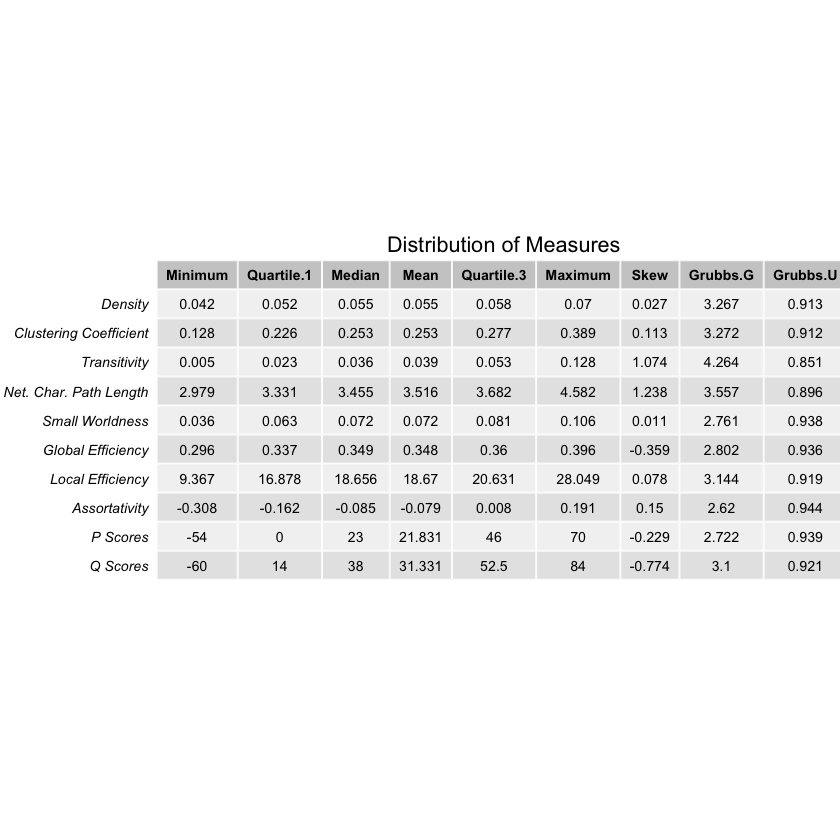

In [50]:
library(gridExtra)
library(grid)

colnames(distributionFrame) = c("Minimum", "Quartile 1", "Median", "Mean", 
                                 "Quartile 3", "Maximum", "Skew", "Grubbs G", "Grubbs U")

rownames(distributionFrame) = c("Density","Clustering Coefficient","Transitivity", 
                                 "Net. Char. Path Length","Small Worldness", 
                                 "Global Efficiency", "Local Efficiency","Assortativity", 
                                 "P Scores", "Q Scores")

myDistributionFrame = data.frame(round(distributionFrame, digits = 3))

myTheme = ttheme_default(base_size = 8.5, base_colour = "black")
grid.table(myDistributionFrame, theme = myTheme)
grid.draw(textGrob("Distribution of Measures", 
                   gp = gpar(fontsize = 13), x = unit(0.6, "npc"), y = unit(0.71, "npc")))


The distribution of the structural topology measures and IGT scores all have skewness, and are not normally distributed. Transitivity, Network Characteristic Path Length, and Q scores have the greatest amount of skewness calculated with 1.074, 1.238, and -0.774, respectively. With the Grubb's test for calculating outliers, all of the variables had a total of 1 outlier.

### 2. Correlation Matrix for Structural Topology Measures

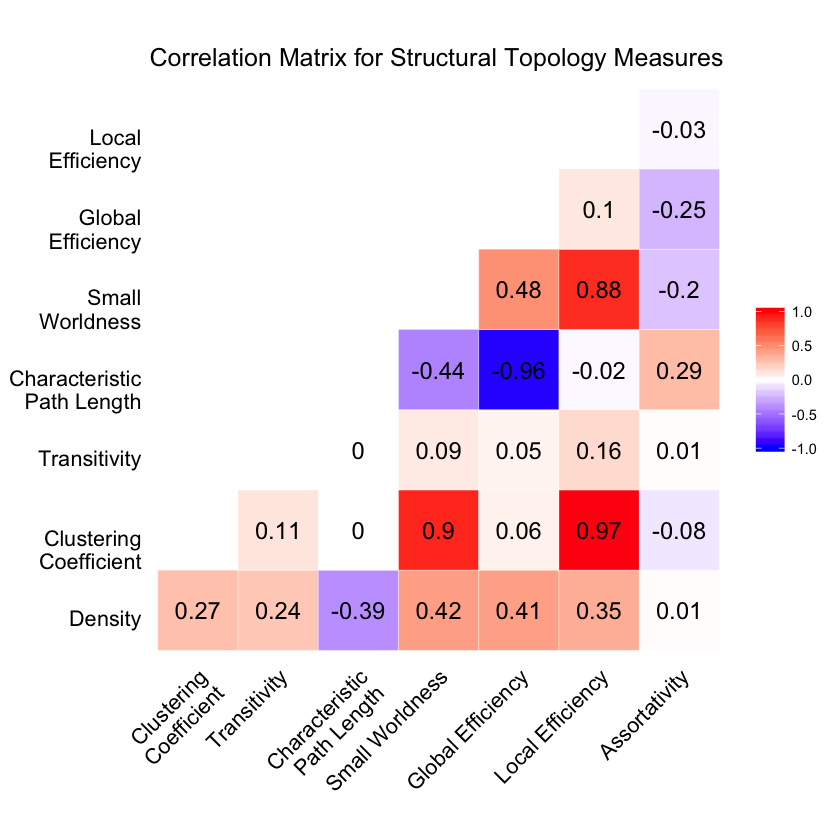

In [51]:
library(reshape2)
library(ggplot2)

myData = WINData[1:125, c(2:9)]
corrMatrix = round(cor(myData, use="pairwise.complete.obs"), 2)

getLowerTri = function(corrMatrix){
  corrMatrix[upper.tri(corrMatrix)] <- NA
  return(corrMatrix)}

corrMatrix[upper.tri(corrMatrix, diag=TRUE)] <- NA
lowerTri = getLowerTri(corrMatrix)
meltedCorrMatrix = melt(lowerTri, na.rm = TRUE )

#Plotting the Correlation Matrix and the plot characteristics
ggplot(data = meltedCorrMatrix, p.mat = p.mat, aes(x=Var1, y=Var2, fill=value)) + 
  
  geom_tile(color="white") +
  scale_x_discrete(labels = c("Clustering\nCoefficient", "Transitivity", "Characteristic\nPath Length", 
                            "Small Worldness", "Global Efficiency", "Local Efficiency", 
                            "Assortativity")) +
  scale_y_discrete(labels = c("Density", "Clustering\nCoefficient", "Transitivity", "Characteristic\nPath Length", 
                            "Small\nWorldness", "Global\nEfficiency", "Local\nEfficiency", 
                            "Assortativity")) +
  scale_fill_gradient2(low = "blue", high = "red", mid="white",
                      midpoint = 0, limit = c(-1,1), space = "Lab",
                      name = "") + 
  theme_minimal() + 
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.grid.major = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    axis.ticks = element_blank(),
    axis.text.y = element_text(vjust = 1,color = "black", size = 13, hjust = 1),
    axis.text.x = element_text(angle = 45, vjust = 1, color = "black", size = 13, hjust = 1)) +
  coord_fixed() +
  geom_text(aes(Var1, Var2, label = value), color = "black", size = 5) + 
  ggtitle("Correlation Matrix for Structural Topology Measures") +
  theme(plot.title = element_text(size=15))


The correlation matrix demonstrates that there are many correlations between the binary structural topology measures. Correlations with absolute value greater or equal to 0.4 are considered high, because that is the threshold for the medium effect size. There were strong correlations between Density and Small Worldness, Density and Global Efficiency, Clustering Coefficient and Small Worldness, Clustering Coefficient and Local Efficiency, Network Characteristic Path Length and Small Worldness, and Network Characteristic Path Length and Global Efficiency, and Small Worldness and Global Efficiency, and Small Worldness and Local Efficiency.

The greatest correlations observed were between Small Worldness and Local Efficiency with 0.88, Clustering Coefficient and Small Worldness with 0.90, and Clustering Coefficient and Local Efficiency with 0.97.

Strong correlations among the variables is evidence that they share the same variance. This is known as multicolinearity, which is a violation of the assumptions for regression. This requires Principal Component Analysis before calculating a Generalized Linear Model.

### 3. Principal Component Analysis (PCA)

In [52]:
library(factoextra)

densityScale = scale(WINData$density)
clusterScale = scale(WINData$clustering_coeff_average)
transScale = scale(WINData$transitivity)
charpathScale = scale(WINData$network_characteristic_path_length)
smallScale = scale(WINData$small.worldness)
globalEScale = scale(WINData$global_efficiency)
localEScale = scale(WINData$local_efficiency)
assortScale = scale(WINData$assortativity_coefficient)
pScale = scale(WINData$baseline_p)
qScale = scale(WINData$baseline_q)

standardizedFrame = data.frame(densityScale, clusterScale, transScale,
                               charpathScale, smallScale, globalEScale,
                               localEScale, assortScale)
myStandardizedData = standardizedFrame
myPCA = princomp(myStandardizedData, cor = TRUE, scores = TRUE)

### Resulting PCA Loading Table:

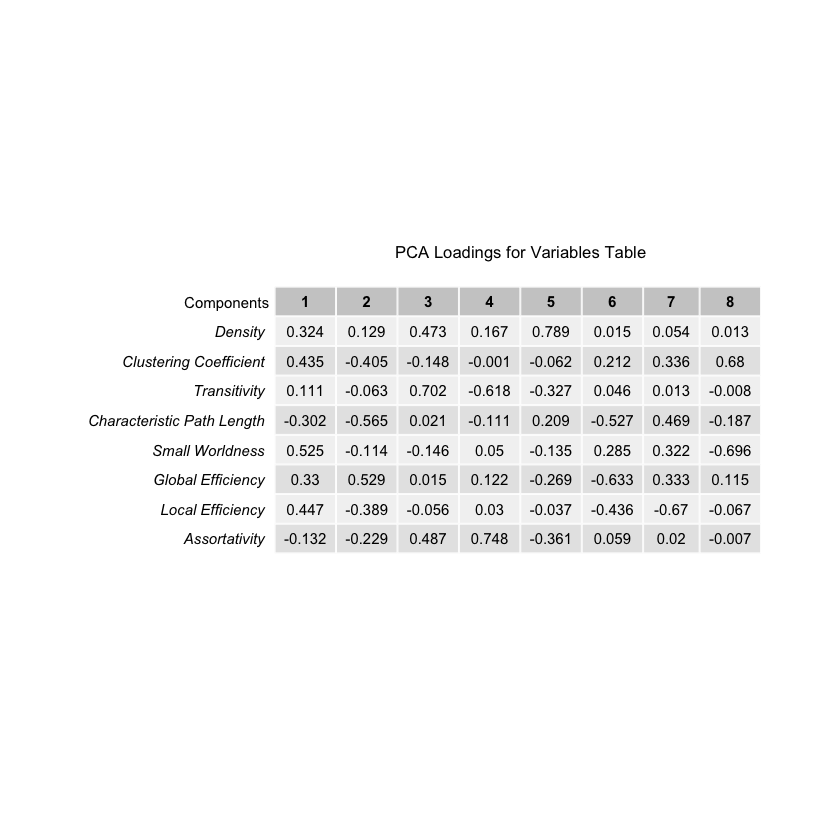

In [53]:
densityLoadings = loadings(myPCA)[1,1:8]
clusterLoadings = loadings(myPCA)[2,1:8]
transLoadings = loadings(myPCA)[3,1:8]
charpathLoadings = loadings(myPCA)[4,1:8]
smallLoadings = loadings(myPCA)[5,1:8]
globalELoadings = loadings(myPCA)[6,1:8]
localELoadings = loadings(myPCA)[7,1:8]
assortLoadings = loadings(myPCA)[8,1:8]

myLoadingsFrame = round(t(data.frame(densityLoadings, clusterLoadings, transLoadings, 
                               charpathLoadings, smallLoadings, globalELoadings, 
                                localELoadings, assortLoadings)), digits=3)

colnames(myLoadingsFrame) <- c("1","2", "3", "4",
                               "5", "6", "7", "8")
rownames(myLoadingsFrame) <- c("Density","Clustering Coefficient","Transitivity",
                              "Characteristic Path Length", "Small Worldness", "Global Efficiency",
                              "Local Efficiency", "Assortativity")

myTheme <- ttheme_default(base_size = 9, base_colour = "black")

grid.table(myLoadingsFrame, theme = myTheme)
grid.draw(textGrob("PCA Loadings for Variables Table", 
                   gp = gpar(fontsize = 10), x = unit(0.62, "npc"), y = unit(0.7, "npc")))
grid.draw(textGrob("Components", 
                   gp = gpar(fontsize = 9), x = unit(0.27, "npc"), y = unit(0.64, "npc")))
myNumberofComp <- c(1,2,3,4,5,6,7,8)

### Resulting PCA Summary Table:

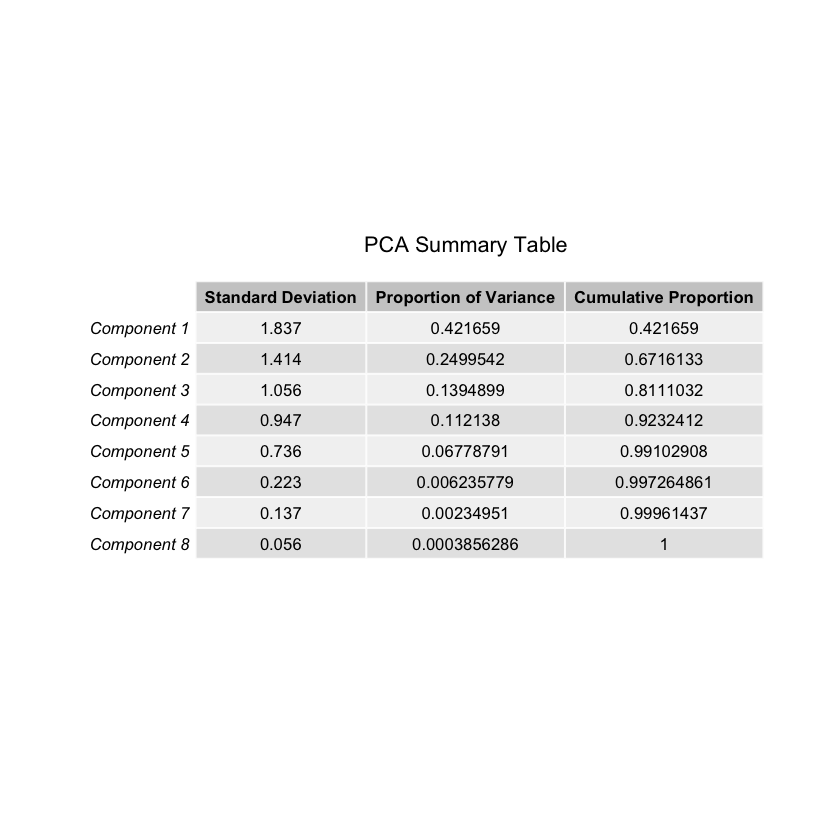

In [54]:
sD = round(summary(myPCA)$sdev, digits=3)

propVar = c(0.421659, 0.2499542, 0.1394899, 0.1121380, 
            0.06778791,0.006235779, 0.00234951, 0.0003856286)
cumVar = c(0.421659, 0.6716133, 0.8111032, 0.9232412, 
                     0.99102908, 0.997264861, 0.99961437, 1.0000000000)

myPCASummaryFrame = data.frame(sD, propVar, cumVar)

rownames(myPCASummaryFrame) <- c("Component 1","Component 2", "Component 3", "Component 4",
                                      "Component 5", "Component 6", "Component 7", "Component 8")
colnames(myPCASummaryFrame) <- c("Standard Deviation", "Proportion of Variance", "Cumulative Proportion")

myTheme <- ttheme_default(base_size = 10, base_colour = "black")

grid.table(myPCASummaryFrame, theme = myTheme)

grid.draw(textGrob("PCA Summary Table", 
                   gp = gpar(fontsize = 13), x = unit(0.555, "npc"), y = unit(0.71, "npc")))


### Resulting Cummulative Proportion of Variance Plot:

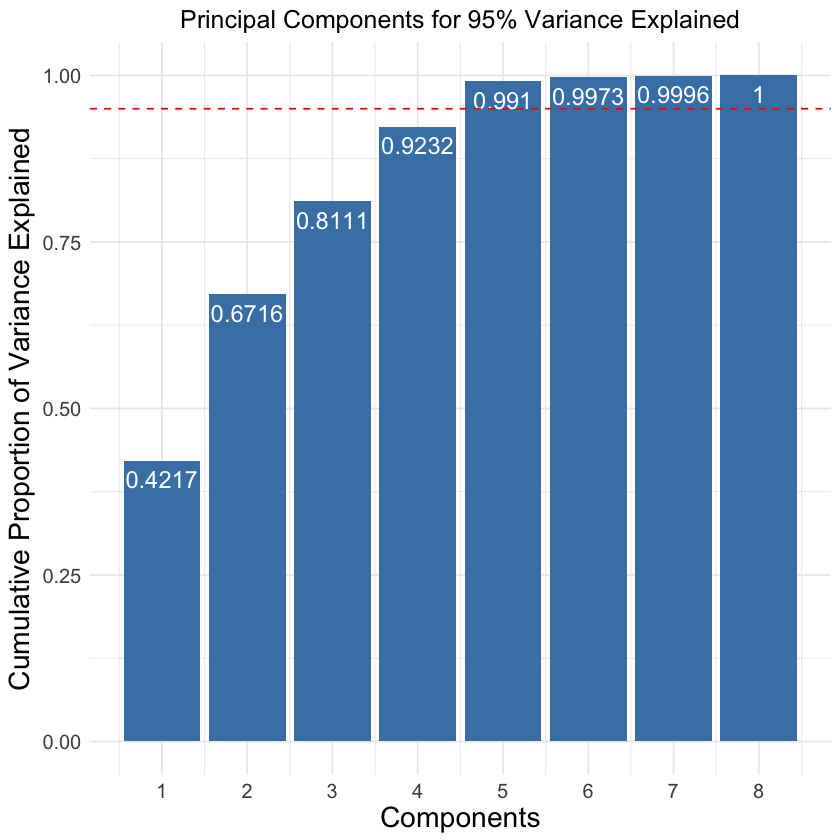

In [55]:
myValues <- c(0.421659, 0.6716133, 0.8111032, 0.9232412, 
              0.99102908, 0.997264861, 0.99961437, 1.0000000000)
myNumberofComp <- c(1:8)

myData <- data.frame(myNumberofComp, myValues)

myTheme <- ttheme_default(base_size = 10, base_colour = "black")
ggplot(myData, aes(x = myNumberofComp, y = myValues)) +
geom_bar(stat = "identity", fill = "steelblue") + 
geom_text(aes(label = round(myValues, digits = 4)), vjust = 1.6, color = "white", size = 5)+
theme_minimal() +
labs(x = "Components", y = "Cumulative Proportion of Variance Explained") +
theme(plot.title = element_text(hjust = 0.5), axis.text=element_text(size=12), axis.title=element_text(size=17)) +
geom_hline(yintercept=.95, linetype="dashed", color = "red") +
scale_x_continuous(breaks=c(1:8))+
ggtitle("Principal Components for 95% Variance Explained")+
theme(plot.title = element_text(size=15))


The PCA Cummulative Proportion of Variance Explained plot demonstrates that the first 5 components optimally account for the variance among the variables. The plot also shows that the cummulative proportion of variance accounted by the first 5 components is 99.102908 %. This suggests that the first 5 principal components should be used when making a model that can predict for P or Q scores.

### 3.  Generalized Linear Model

#### P Score

In [56]:
library(MASS)
library(boot)
library(glmnet)

#Principal Component Calculation
myData <- standardizedFrame[,c(1:8)]
myPCA <- princomp(na.omit(myData), cor = TRUE, scores = TRUE)
myComponents <- myPCA$scores[,1:8]

#Fixing P Score Length
myP <- WINData$baseline_p

#Combining both lists into one data.frame
myComboDataP <- data.frame(myPCA$scores[, 1:8], myP)

#GLM Calculation
myPFit <- glm(myP~myComponents, family= gaussian, data=myComboDataP)

#Prediction values from GLM
myPred <- myPFit$fitted.values

myCorrP = cor(myP, myPred)
myCorrP

[1] 0.2324948

#### Q Score

In [57]:
#Principal Component Calculation
myData <- standardizedFrame[,c(1:8)]
myPCA <- princomp(na.omit(myData), cor = TRUE, scores = TRUE)
myComponents <- myPCA$scores[,1:8]

myQ <- WINData$baseline_q

#Combining both lists into one data.frame
myComboDataQ <- data.frame(myPCA$scores[,1:5], myQ)

#GLM Calculation
myQFit <- glm(myQ~myComponents, family= gaussian, data=myComboDataQ)


#Prediction values from GLM
myPred <- myQFit$fitted.values

myCorrQ = cor(myQ, myPred)
myCorrQ

[1] 0.3176982

The GLM with the P scores and the top 5 principal components produces predicts P scores with 0.232 correlation with the actually observed P scores given the 5 principal components.

The GLM with the Q scores and the top 5 principal components produces predicts Q scores with 0.318 correlation with the actually observed Q scores given the 5 principal components.

These correlations are too low to conclude that the GLM can accurately predict P or Q scores. 

### 4. GLM Inference Test instead of a Prediction Test

### Resulting Table of GLM Coefficient Estimates with P and Q Scores

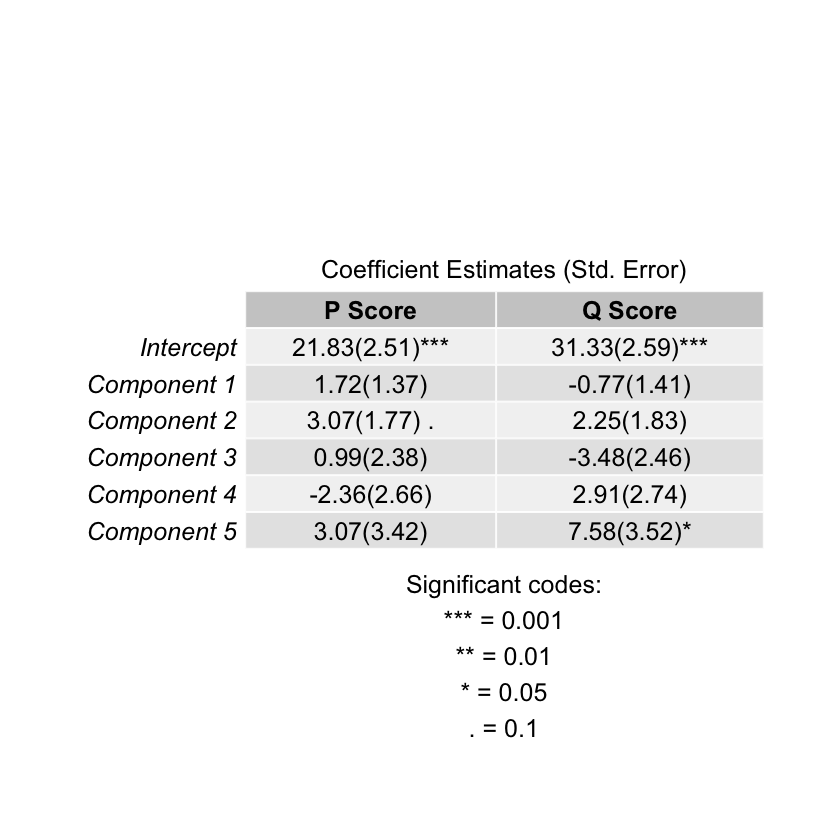

In [59]:
P.fit = glm(myP~myComponents)
Q.fit = glm(myQ~myComponents)

Intercept <-  c("21.83(2.51)***","31.33(2.59)***")
Component1 <- c("1.72(1.37)","-0.77(1.41)")
Component2 <- c("3.07(1.77) .","2.25(1.83)")
Component3 <- c("0.99(2.38)","-3.48(2.46)")
Component4 <- c("-2.36(2.66)","2.91(2.74)")
Component5 <- c("3.07(3.42)","7.58(3.52)*")


myLoadingsFrame <- t(data.frame(Intercept, Component1, Component2,
                               Component3, Component4, Component5))


colnames(myLoadingsFrame) <- c("          P Score          ","           Q Score           ")
rownames(myLoadingsFrame) <- c("Intercept","Component 1", "Component 2", "Component 3",
                                "Component 4", "Component 5")

myTheme <- ttheme_default(base_size = 15, base_colour = "black")

grid.table(myLoadingsFrame, theme = myTheme)

grid.draw(textGrob("Coefficient Estimates (Std. Error)", 
                   gp = gpar(fontsize = 15), x = unit(0.6, "npc"), y = unit(0.68, "npc")))
grid.draw(textGrob("Significant codes:\n*** = 0.001\n** = 0.01\n* = 0.05\n. = 0.1", 
                   gp = gpar(fontsize = 15), x = unit(0.6, "npc"), y = unit(0.22, "npc")))


The generalized linear model of the PCA components and the P scores shows that component 2 is able to associate with P scores with a p-value less than 0.1. The rest of the components do not appear to be able to predict Q scores accurately to a significant degree.

The generalized linear model of the PCA components and the Q scores shows that component 5 is able to associate with Q Scores with a p-value of less than 0.05. The rest of the components do not appear to be able to predict Q scores accurately to a significant degree.

### Resulting Table of Weights Mapped to the Topology Space

#### Component 2

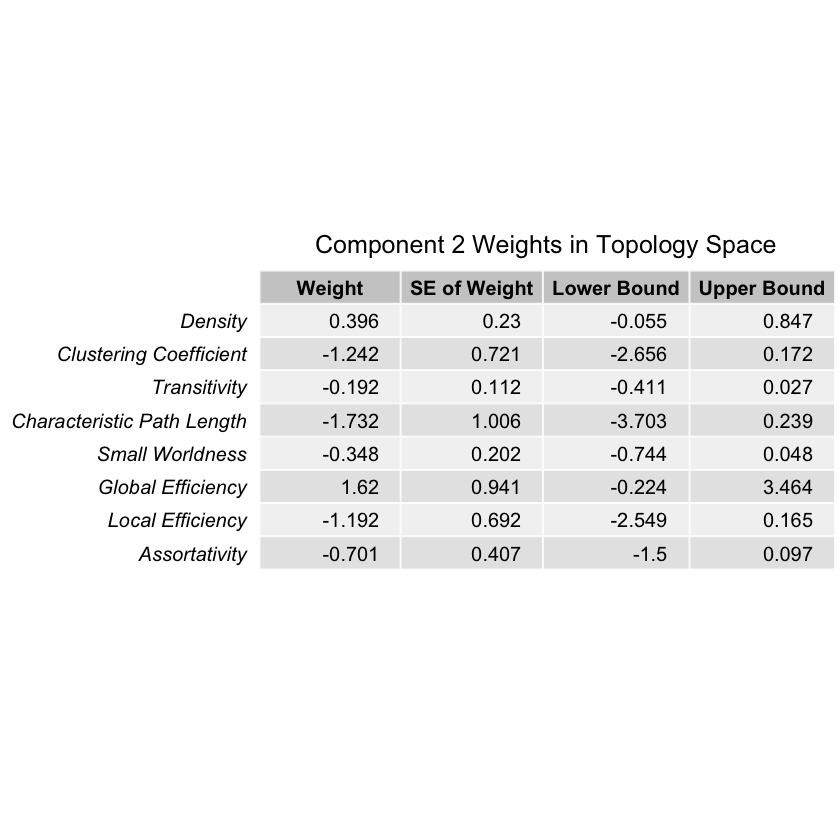

In [36]:
library("factoextra")

myData <- standardizedFrame
myPCA = princomp(na.omit(myData),
               cor = TRUE,
               scores = TRUE)

#component 5 vector 8x1 column
V <- myPCA$loadings[,2] 

#Component 5 Coefficient Estimate (beta)
beta <- 3.0651 

#Standard Error of Coefficient Estimate
stErrorBeta <- 1.7799 

#effect B in the original data space
w = V*beta 

#standard error of the effect
stErrorW = abs(V*stErrorBeta)

#Boundaries of effect
lowerBound = w - (1.96*stErrorW)
upperBound = w + (1.96*stErrorW)

myEffectsFrame <- data.frame(w,stErrorW,lowerBound,upperBound)
myEffectsFrame <- round(myEffectsFrame, digits = 3)

colnames(myEffectsFrame) <- c("     Weight     ","SE of Weight", "Lower Bound", "Upper Bound")
rownames(myEffectsFrame) <- c("Density","Clustering Coefficient",
                               "Transitivity","Characteristic Path Length", 
                               "Small Worldness", "Global Efficiency",
                               "Local Efficiency", "Assortativity")

myTheme <- ttheme_default(core=list(fg_params=list(hjust=1,x=.85)),base_size = 12, base_colour = "black")

myGrid <- grid.table(myEffectsFrame, theme = myTheme)

grid.draw(textGrob("Component 2 Weights in Topology Space", 
                   gp = gpar(fontsize = 15), x = unit(0.65, "npc"), y = unit(0.71, "npc")))

Using only the Component 2 model coefficient to calculate the weights for each measure that associate with the P Scores, we can multiply the coefficient by the loadings of each topology measure in order to transform the value of the weights from the components to data space with the topology measures. The table in data space demonstrates that a decrease in clustering coefficient, characteristic path length, and a decrease in local efficiency lead to an increase in P Score, whereas an increase in global efficiency lead to an increase in P Score. 

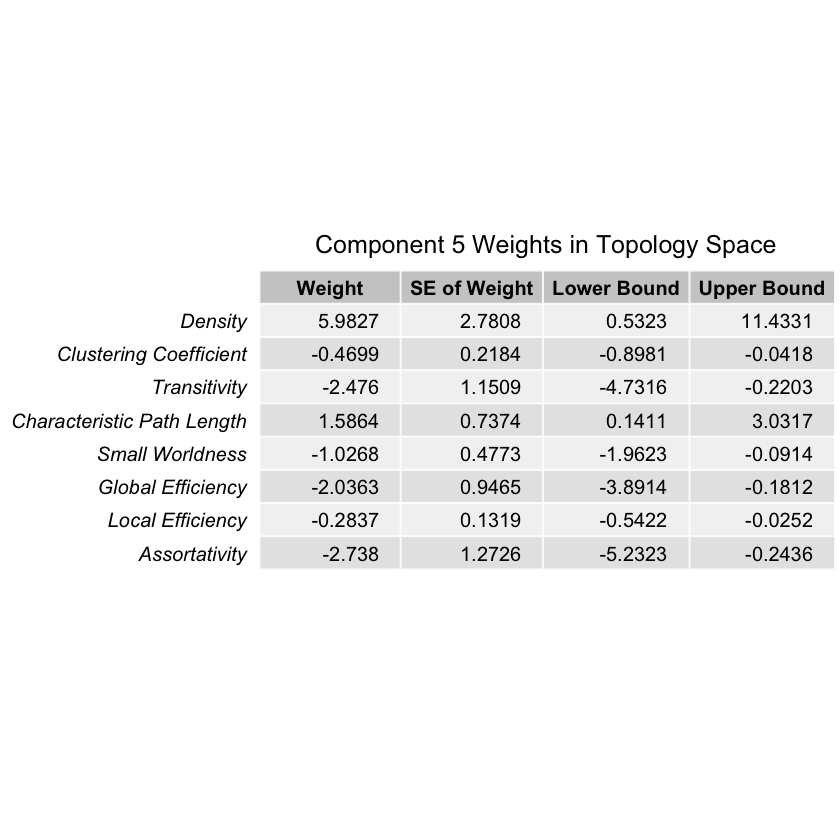

In [37]:
library("factoextra")

myData <- standardizedFrame
myPCA = princomp(na.omit(myData),
               cor = TRUE,
               scores = TRUE)

#component 5 vector 8x1 column
V <- myPCA$loadings[,5] 

#Component 5 Coefficient Estimate (beta)
beta <- 7.5788 

#Standard Error of Coefficient Estimate
stErrorBeta <- 3.5227 

#effect B in the original data space
w = V*beta 

#standard error of the effect
stErrorW = abs(V*stErrorBeta)

#Boundaries of effect
lowerBound = w - (1.96*stErrorW)
upperBound = w + (1.96*stErrorW)

myEffectsFrame <- data.frame(w,stErrorW,lowerBound,upperBound)
myEffectsFrame <- round(myEffectsFrame, digits = 4)

colnames(myEffectsFrame) <- c("     Weight     ","SE of Weight", "Lower Bound", "Upper Bound")
rownames(myEffectsFrame) <- c("Density","Clustering Coefficient",
                               "Transitivity","Characteristic Path Length", 
                               "Small Worldness", "Global Efficiency",
                               "Local Efficiency", "Assortativity")

myTheme <- ttheme_default(core=list(fg_params=list(hjust=1,x=.85)),base_size = 12, base_colour = "black")
myGrid <- grid.table(myEffectsFrame, theme = myTheme)
grid.draw(textGrob("Component 5 Weights in Topology Space", 
                   gp = gpar(fontsize = 15), x = unit(0.65, "npc"), y = unit(0.71, "npc")))


Using only the Component 5 model coefficients as weights for each component in predicting Q Scores, we can multiply them by the loadings of each topology measure in order to transform the value of the weights from the components to data space with the topology measures. The table in data space demonstrates that density and network characteristic path length lead to an increase in Q Score, whereas a decrease in clustering coefficient, transitivity, small worldness, global efficiency, local efficiency, and assortativity lead to an increase in Q Score. Density has the greatest positive effect on Q score, and transitivity has the greatest negative effect.

### 5. Bootstrapping

#### Component 2 with P Scores

[1] 0.511

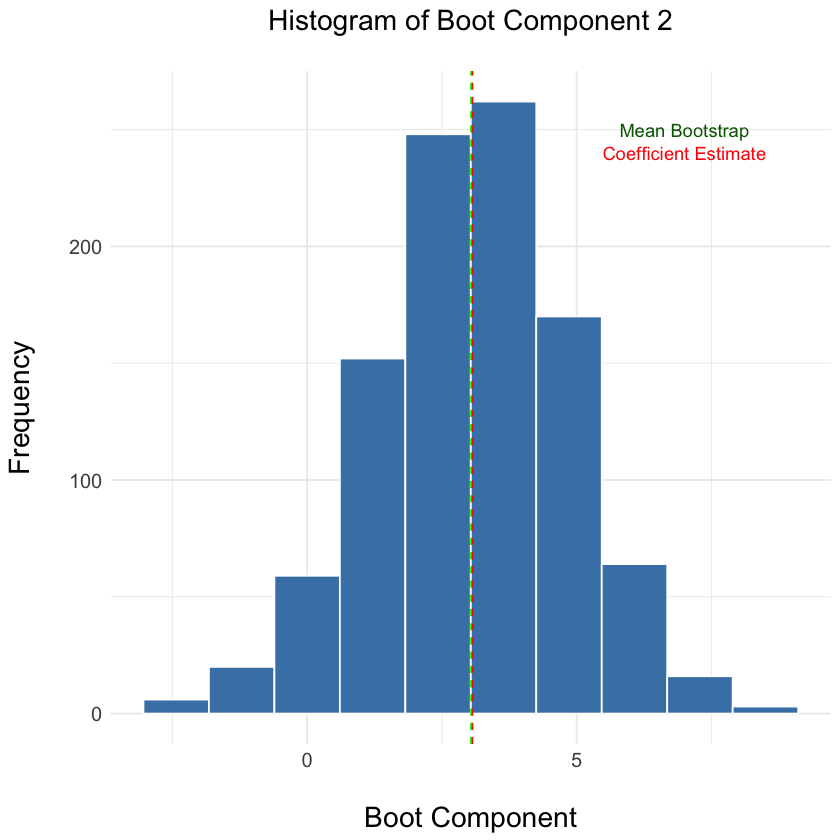

In [38]:
# Calculate the original effect
real_comp2 = myPFit$coefficients[1+2]

# Determine the sample size (will be important in a minute) (n=124)
n = dim(WINData)[1]
myComponent2 = myComponents[,2]

# Create a bootstrap of 1000 iterations of the regression model 
boot_comp2 = matrix(NaN, nrow=1000)
for (i in 1:1000){
    index = sample(1:n, replace=TRUE)
    boot_comp2[i] = glm(myP[index]~myComponent2[index])$coefficients[2]
}

# Since the real effect is positive we look for permuted results
# that are greater than the observed
p = sum(boot_comp2 > real_comp2)/1000 
p

# Let's look at the bootstrap
myTheme <- ttheme_default(base_size = 10, base_colour = "black")

ggplot(data.frame(boot_comp2), aes(x=boot_comp2))+
  geom_histogram(color="white", fill="steelblue", stat = "bin",
  position = "stack", bins = 10) + 
  theme_minimal() +
  labs(x = "\nBoot Component", y = "Frequency\n") +
  theme(plot.title = element_text(hjust = 0.5), axis.text=element_text(size=12), axis.title=element_text(size=17)) +
  geom_vline(xintercept=(mean(boot_comp2)), linetype="dashed", color = "green") +
  geom_vline(xintercept=(mean(real_comp2)), linetype="dashed", color = "red") +
  annotate("text", x = 7, y = 250, label = "Mean Bootstrap", color = "darkgreen") +
  annotate("text", x = 7, y = 240, label = "Coefficient Estimate", color = "red") +

ggtitle("Histogram of Boot Component 2\n")+
theme(plot.title = element_text(size=17))


#### Component 5 with Q Scores

[1] 0.511

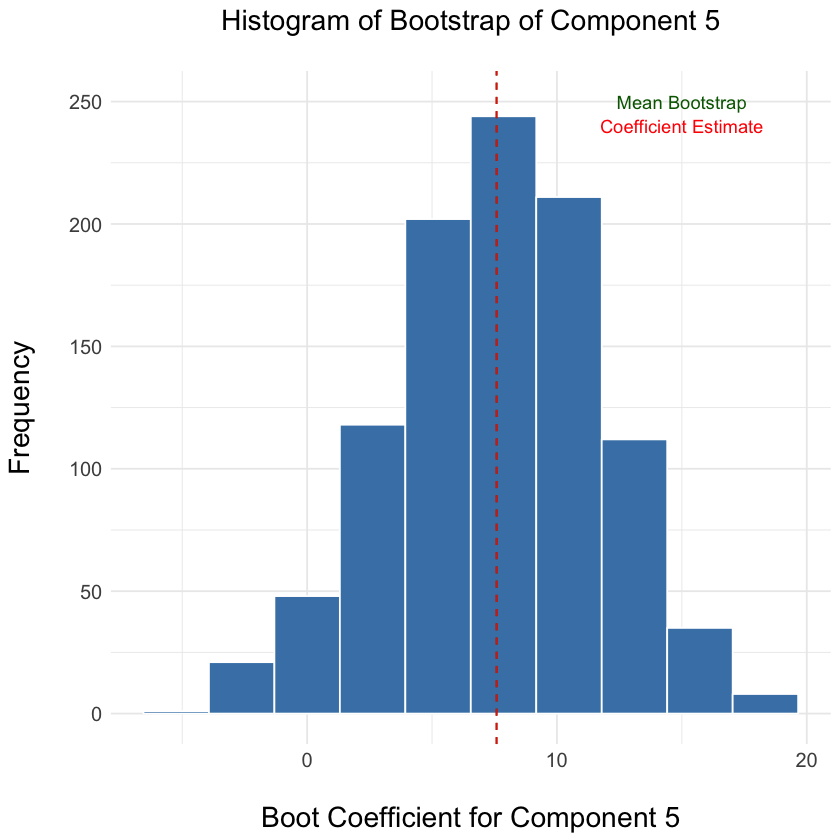

In [39]:
# Calculate the original effect
real_comp5 = myQFit$coefficients[1+5]

# Determine the sample size (will be important in a minute) (n=124)
n = dim(WINData)[1]
myComponent5 = myComponents[,5]

# Create a bootstrap of 1000 iterations of the regression model 
boot_comp5 = matrix(NaN, nrow=1000)
for (i in 1:1000){
    index = sample(1:n, replace=TRUE)
    boot_comp5[i] = glm(myQ[index]~myComponent5[index])$coefficients[2]   
}

p = sum(boot_comp2 > real_comp2)/1000 
p

# Let's look at the bootstrap
myTheme <- ttheme_default(base_size = 10, base_colour = "black")

ggplot(data.frame(boot_comp5), aes(x=boot_comp5))+
  geom_histogram(color="white", fill="steelblue", stat = "bin",
  position = "stack", bins = 10) + 
  theme_minimal() +
  labs(x = "\nBoot Coefficient for Component 5", y = "Frequency\n") +
  theme(plot.title = element_text(hjust = 0.5), axis.text=element_text(size=12), axis.title=element_text(size=17)) +
  geom_vline(xintercept=(mean(boot_comp5)), linetype="dashed", color = "darkgreen", show.legend = True) +
  geom_vline(xintercept=(mean(real_comp5)), linetype="dashed", color = "red", show.legend = True) +
  annotate("text", x = 15, y = 250, label = "Mean Bootstrap", color = "darkgreen") +
  annotate("text", x = 15, y = 240, label = "Coefficient Estimate", color = "red") +
  ggtitle("Histogram of Bootstrap of Component 5\n")+
  theme(plot.title = element_text(size=17), legend.position="right")



### Resulting Tables of Bootstrapping Confidence Intervals

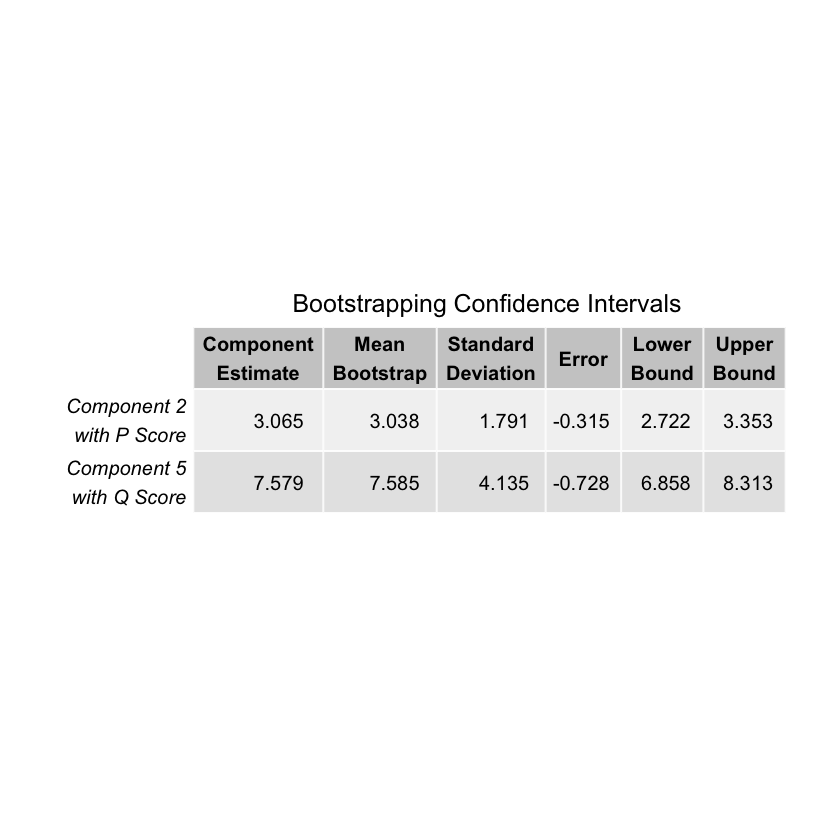

In [62]:
real = real_comp2
mean = mean(boot_comp2)
sd = sd(boot_comp2)
error = -qnorm(1-0.025)*sd/sqrt(n)
up_bound = mean + error
low_bound = mean - error

myBoot2Frame <- data.frame(real, mean, sd, error, up_bound, low_bound)

real = real_comp5
mean = mean(boot_comp5)
sd = sd(boot_comp5)
error = -qnorm(1-0.025)*sd/sqrt(n)
up_bound = mean + error
low_bound = mean - error

myBoot5Frame <- data.frame(real, mean, sd, error, up_bound, low_bound)

myBootstrapFrame <- rbind(myBoot2Frame, myBoot5Frame)
myBootstrapFrame <- round(myBootstrapFrame, digits = 3)

colnames(myBootstrapFrame) <- c("Component\nEstimate",
                                "Mean\nBootstrap",
                                "Standard\nDeviation", 
                                "Error", "Lower\nBound", 
                                "Upper\nBound")

rownames(myBootstrapFrame) <- c("Component 2\n with P Score", 
                                "Component 5\n with Q Score")

myTheme <- ttheme_default(core=list(fg_params=list(hjust=1,x=.85)),
                          base_size = 12, base_colour = "black")

myGrid <- grid.table(myBootstrapFrame, theme = myTheme)

grid.draw(textGrob("Bootstrapping Confidence Intervals", 
                   gp = gpar(fontsize = 15), x = unit(0.58, "npc"), 
                                             y = unit(0.64, "npc")))


The mean bootstrap estimate is highly comparable to the coefficient estimate. Component 2 had a confidence interval between 2.722 and 3.353, and the component 5 had a confidence interval between 6.858 and 8.313, which were both fairly narrow.

### 6. Cross Validation of the PCR looking at hold out set reliability

#### k-Fold CV Function

In [63]:
kfcv.sizes = function(n, k=10) {
  # generate sample sizes for k-fold cross validation on a data set of
  # size n
  
  # author: Matthias C. M. Troffaes
  # date: 22 Nov 2010
  # license: GPLv3
  # usage:
  #
  #   kfcv.sizes(n, k=...)
  #

  sizes = c()
  for (i in 1:k) {
    first = 1 + (((i - 1) * n) %/% k)
    last = ((i * n) %/% k)
    sizes = append(sizes, last - first + 1)
  }
  sizes
}

kfcv.testing = function(n, k=10) {
  # generate testing sample indices for k-fold cross validation on a
  # data set of size n
  
  # author: Matthias C. M. Troffaes
  # date: 22 Nov 2010
  # license: GPLv3
  # usage:
  #
  #   kfcv.testing(n, k=...)
  #

  indices = list()
  sizes = kfcv.sizes(n, k=k)
  values = 1:n
  for (i in 1:k) {
    # take a random sample of given size
    s = sample(values, sizes[i])
    # append random sample to list of indices
    indices[[i]] = s
    # remove sample from values
    values = setdiff(values, s)
  }
  indices
}

#### CV for P Scores

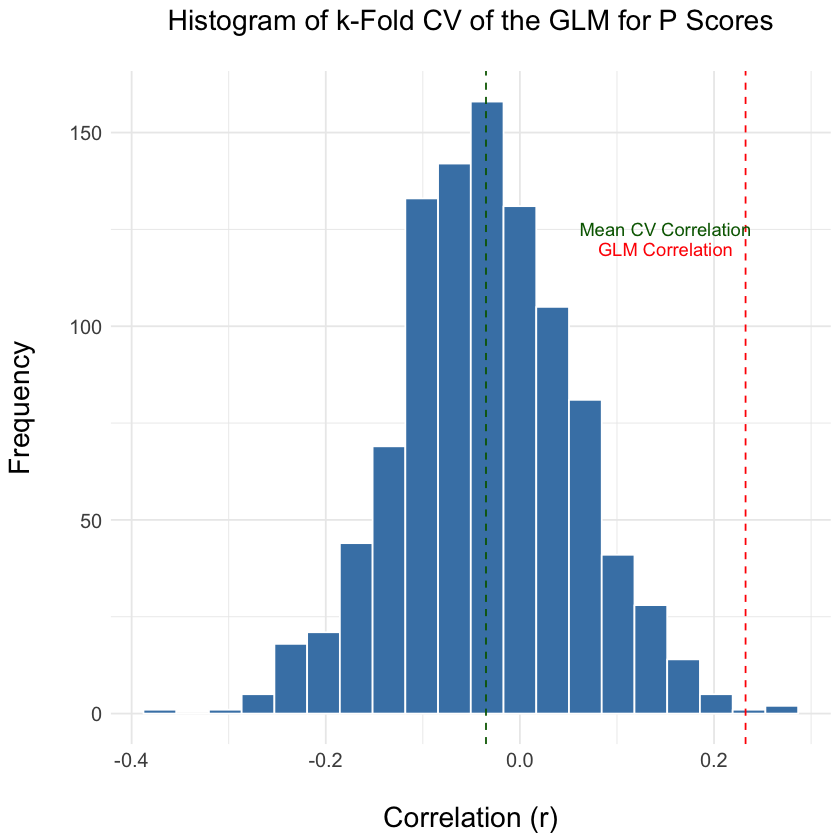

In [64]:
# Turn off warnings
options(warn = -1)

# Define number of folds
n_folds = 10

# Define number of resamples
n_iter = 1000

# Matrix that will store P prediction values for each participant for each iteration
store_P_predictions = matrix(0, 124, n_iter) 

# Matrix that will store P coefficients for each variable for each iteration
store_P_coef = matrix(0, n_iter, 9) 

# Matrix that will store correlation coefficient for each iteration
iter_P_corr = matrix(0, n_iter, 1) 


for (iter in 1:n_iter) {

    # Make our 10 fold cross validation indices
    indices = kfcv.testing(124, k=n_folds)

    PredP = matrix(0, 124, 1)
    CVPCoefs = matrix(0, n_folds, 9)

    for (fold in 1:n_folds) {
        test = unlist(indices[fold])
        train = unlist(indices[setdiff(1:n_folds, fold)])

        cvfit <- glm(myP~myComponents, data = myComboDataP, subset = train)
        PredP[test] = predict(cvfit, data = myComboDataP, subset = test)
        
        CVPCoefs[fold,] = coef(cvfit)
        
    }

    # Storing P score Predictions
    iter_P_corr[iter] = cor(myP, PredP)
    store_P_predictions[,iter] = PredP
    store_P_coef[iter,] = colMeans(CVPCoefs)

}

myFittedPScores <- cvfit$fitted.values

myTheme <- ttheme_default(base_size = 10, base_colour = "black")

ggplot(data.frame(iter_P_corr), aes(x=iter_P_corr)) +
  geom_histogram(color="white", fill="steelblue", stat = "bin",
  position = "stack", bins = 20) + 
  theme_minimal() +
  labs(x = "\nCorrelation (r)", y = "Frequency\n") +
  theme(plot.title = element_text(hjust = 0.5), axis.text=element_text(size=12), axis.title=element_text(size=17)) +
  geom_vline(xintercept=(mean(iter_P_corr)), linetype="dashed", color = "darkgreen", show.legend = True) +
  geom_vline(xintercept=(myCorrP), linetype="dashed", color = "red", show.legend = True) +
  annotate("text", x = 0.15, y = 125, label = "Mean CV Correlation", color = "darkgreen") +
  annotate("text", x = 0.15, y = 120, label = "GLM Correlation", color = "red") +
  ggtitle("Histogram of k-Fold CV of the GLM for P Scores\n") +
  theme(plot.title = element_text(size=17), legend.position="right")



#### CV for Q Scores

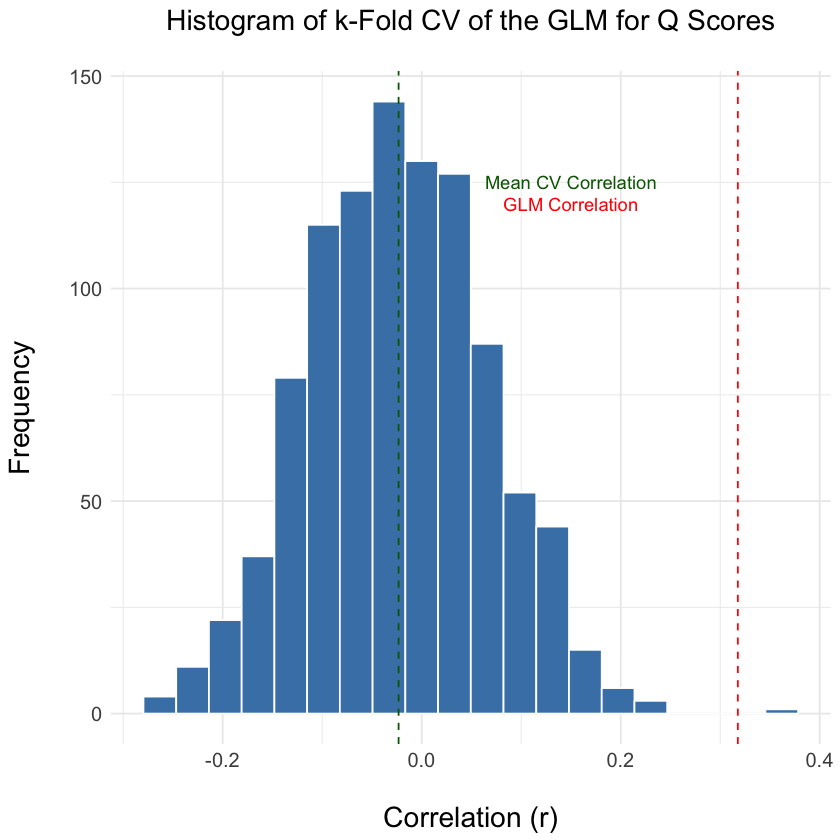

In [65]:
# Turn off warnings
options(warn = -1)

# Define number of folds
n_folds = 10

# Define number of resamples
n_iter = 1000

# Matrix that will store P prediction values for each participant for each iteration
store_Q_predictions = matrix(0, 124, n_iter) 

# Matrix that will store P coefficients for each variable for each iteration
store_Q_coef = matrix(0, n_iter, 9) 

# Matrix that will store correlation coefficient for each iteration
iter_Q_corr = matrix(0, n_iter, 1) 


for (iter in 1:n_iter) {

    # Make our 10 fold cross validation indices
    indices = kfcv.testing(124, k=n_folds)

    PredQ = matrix(0, 124, 1)
    CVQCoefs = matrix(0, n_folds, 9)

    for (fold in 1:n_folds) {
        test = unlist(indices[fold])
        train = unlist(indices[setdiff(1:n_folds, fold)])

        cvfit <- glm(myQ~myComponents, data = myComboDataQ, subset = train)
        PredQ[test] = predict(cvfit, data = myComboDataQ, subset = test)
        
        CVQCoefs[fold,] = coef(cvfit)
        
    }

    # Storing Q score Predictions
    iter_Q_corr[iter] = cor(myQ, PredQ)
    store_Q_predictions[,iter] = PredQ
    store_Q_coef[iter,] = colMeans(CVQCoefs)

}

myFittedQScores <- cvfit$fitted.values

myTheme <- ttheme_default(base_size = 10, base_colour = "black")

ggplot(data.frame(iter_Q_corr), aes(x=iter_Q_corr)) +
  geom_histogram(color="white", fill="steelblue", stat = "bin",
  position = "stack", bins = 20) + 
  theme_minimal() +
  labs(x = "\nCorrelation (r)", y = "Frequency\n") +
  theme(plot.title = element_text(hjust = 0.5), axis.text=element_text(size=12), axis.title=element_text(size=17)) +
  geom_vline(xintercept=(mean(iter_Q_corr)), linetype="dashed", color = "darkgreen", show.legend = True) +
  geom_vline(xintercept=(myCorrQ), linetype="dashed", color = "red", show.legend = True) +
  annotate("text", x = 0.15, y = 125, label = "Mean CV Correlation", color = "darkgreen") +
  annotate("text", x = 0.15, y = 120, label = "GLM Correlation", color = "red") +
  ggtitle("Histogram of k-Fold CV of the GLM for Q Scores\n") +
  theme(plot.title = element_text(size=17), legend.position="right")



The cross validation correlations for the 5 components and P score was -0.0349, and the cross validation correlations for the 5 components and Q score was -0.0232, which are both very low in order to conclude that the model is able to accurately predict P or Q scores.

The cross validation errors calculated from the GLM are 1.026819 and 1.026819, which are significantly low values.
The cross validation errors calculated from the GLM are 1.061468 and 1.061468, which is significantly low value.

### 7. Bayes Factor 

Loading required package: coda
************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


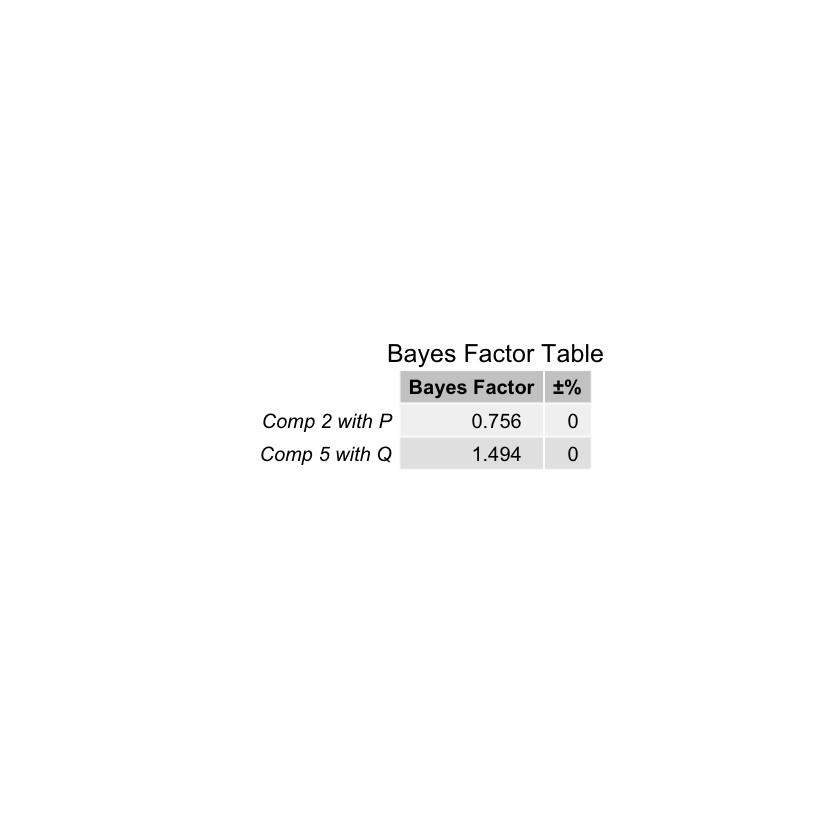

In [44]:
library(ISLR)
library(BayesFactor)

comp2PBF <- lmBF(myP~Comp.2, data = myComboDataP)
bayesFactor = 0.7562461
difference = 0

myComp2PBFFrame <- data.frame(bayesFactor, difference)

comp5QBF <- lmBF(myQ~Comp.5, data = myComboDataQ)
bayesFactor = 1.493526
difference = 0

myComp5QBFFrame <- data.frame(bayesFactor, difference)

myBFFrame <- rbind(myComp2PBFFrame, myComp5QBFFrame)
myBFFrame <- round(myBFFrame, digits = 3)

colnames(myBFFrame) <- c("Bayes Factor", "±%")

rownames(myBFFrame) <- c("Comp 2 with P", 
                                "Comp 5 with Q")

myTheme <- ttheme_default(core=list(fg_params=list(hjust=0)),
                          base_size = 12, base_colour = "black")

myGrid <- grid.table(myBFFrame, theme = myTheme)

grid.draw(textGrob("Bayes Factor Table", 
                   gp = gpar(fontsize = 15), x = unit(0.59, "npc"), 
                                             y = unit(0.58, "npc")))


The bayes factors for both the component 2 and component 5 show marginal to no evidence for being able to predict P or Q scores respectively. 

### Conclusions

Here we tested the hypothesis that individuals with a more small-world structural brain networks would be better at feedback driven, value-based decision-making. First we found that the graph topology measures of white matter networks had a low dimensional structure that could be mostly explained by five principal components. A regression analysis examining how these components correlated with the ability to use feedback to maximize long term payoffs (P) and the sensitivity to high frequency rewards (Q) did not find an association with the former, but did with the latter. One component, mapping heavily on density, transitivity, global efficiency, and assortativity topology measures, reliably associated with sensitivity to rewards, such that these structural network properties may predict greater sensitivity.